# Pew Research Center's Religious Landscape Study

In this notebook you will clean and wrangle a dataset that has come out of the Pew Research Center's [Religious Landscape Study](http://www.pewforum.org/religious-landscape-study/). The actual dataset used comes from Hadley Wickham's [Tidy Data Repository](https://github.com/hadley/tidy-data).

## Imports

In [144]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

## Read in the data

Here, we read in the data using `read_csv`:

In [209]:
df = pd.read_csv('/data/tidy-data/data/pew.csv')

Extract the following columns and rename them:

* `q16`
* `reltrad` -> `religion`
* `income`

In [210]:
# YOUR CODE HERE
df = df[['q16', 'reltrad', 'income']]
df.columns = ['q16', 'religion', 'income']

In [211]:
df.head()

,q16,religion,income
0,Protestant,Evangelical Protestant Churches,"75 to under $100,000"
1,Protestant,Mainline Protestant Churches,"20 to under $30,000"
2,Protestant,Mainline Protestant Churches,"30 to under $40,000"
3,Nothing in particular,Unaffiliated,"Less than $10,000"
4,Jewish (Judaism),Jewish,"50 to under $75,000"


In [212]:
assert list(df.columns)==['q16', 'religion', 'income']
assert len(df)==35556

## Religion

Now you are going to tidy up the `religion` column. Perform the following transformations of the `religion` column:

* Replace `'Churches'` by an empty string
* Replace `'Protestant'` by `'Prot'`
* For the rows that have `" Atheist (do not believe in God) "` in the `q16` column, put the value `'Atheist'` in the
  `religion` column
* For rows that have `" Agnostic (not sure if there is a God) "` in the `q16` column, put the value `'Agnostic'` in the `religion` column
* For rows that have the phrase `"(no information on religious affiliation)"`, replace their value by `'Unknown'`
* Strip leading and trailing whitespace

In [213]:
# YOUR CODE HERE
df['religion'] = df['religion'].str.replace("Churches", "").str.replace("Protestant", "Prot")
df['religion'][df['q16'] == ' Atheist (do not believe in God) '] = 'Atheist'
df['religion'][df['q16'] == ' Agnostic (not sure if there is a God) '] = 'Agnostic'
df.replace({".*(no information on religious affiliation).*":"Unknown"}, inplace=True, regex=True)
df = df.apply(lambda x: x.str.strip())

In [214]:
assert list(df['religion'].unique()) == \
['Evangelical Prot',
 'Mainline Prot',
 'Unaffiliated',
 'Jewish',
 'Unknown',
 'Other Faiths',
 'Historically Black Prot',
 "Jehovah's Witness",
 'Atheist',
 'Agnostic',
 'Catholic',
 'Buddhist',
 'Mormon',
 'Muslim',
 'Hindu',
 'Other Christian',
 'Orthodox',
 'Other World Religions']

Now do the following:

* Extract out just the `religion` and `income` columns
* Convert the `religion` column to a categorical type

In [215]:
# YOUR CODE HERE
df = df[['religion', 'income']]
df['religion'] = df['religion'].astype('category')

In [216]:
df.head()

,religion,income
0,Evangelical Prot,"75 to under $100,000"
1,Mainline Prot,"20 to under $30,000"
2,Mainline Prot,"30 to under $40,000"
3,Unaffiliated,"Less than $10,000"
4,Jewish,"50 to under $75,000"


In [217]:
assert list(df.columns)==['religion', 'income']
assert df.religion.dtype.name=='category'

Now make an appropriately labeled Seaborn `countplot` of the `religion` column on the y-axis, sorted by the number of people in each religion.

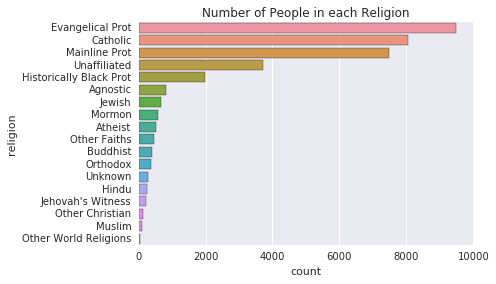

In [218]:
# YOUR CODE HERE
sns.countplot(y = "religion", data = df, order = df.religion.value_counts().index)
plt.title("Number of People in each Religion")

## Income

Now work on the `income` column. Replace the existing income strings by the ones in the tests below:

In [219]:
# YOUR CODE HERE
df.replace(["75 to under $100,000", "20 to under $30,000", "30 to under $40,000", 
            "Less than $10,000", "50 to under $75,000", "$150,000 or more", 
            "40 to under $50,000", "Don't know/Refused (VOL.)", "100 to under $150,000", "10 to under $20,000"], 
           ['$75-100k','$20-30k','$30-40k','<$10k','$50-75k','>150k','$40-50k','Unknown','$100-150k','$10-20k'], inplace=True)

In [220]:
assert list(df.income.unique())==\
    ['$75-100k',
     '$20-30k',
     '$30-40k',
     '<$10k',
     '$50-75k',
     '>150k',
     '$40-50k',
     'Unknown',
     '$100-150k',
     '$10-20k']

Convert the `income` column to a category type:

In [221]:
# YOUR CODE HERE
df['income'] = df['income'].astype('category')

In [222]:
assert df.income.dtype.name=='category'

Mow make an approprately labeled `countplot` of the `income` column, ordered by the income level:

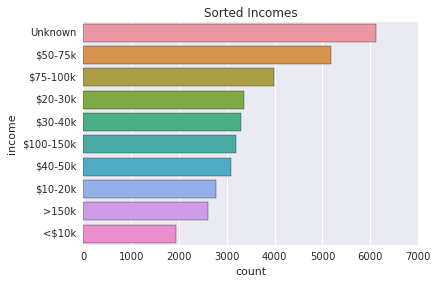

In [223]:
# YOUR CODE HERE
sns.countplot(y = "income", data = df, order = df.income.value_counts().index)
plt.title("Sorted Incomes")

## Simple Analysis

Using a `groupby` and custom aggregation do the following:

* Extract rows where the income is not `'Unknown'`
* Compute the most commonly occuring income category for each religion (mode)
* Sort the result by the mode income
* Store the result in a single-column `DataFrame` with an index that is the religion and a column name of `mode_income`

In [251]:
df = df[df.income != "Unknown"]

In [252]:
# YOUR CODE HERE
religion_group = df.groupby("religion")

In [256]:
df2 = pd.DataFrame(religion_group['income'].apply(lambda x: x.describe().top).sort_values())

In [257]:
df2.columns = ['mode_income']

In [258]:
df2

,mode_income
religion,
Historically Black Prot,$10-20k
Agnostic,$50-75k
Other World Religions,$50-75k
Other Faiths,$50-75k
Orthodox,$50-75k
Muslim,$50-75k
Mormon,$50-75k
Mainline Prot,$50-75k
Unknown,$50-75k
